In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import scipy as sc

In [4]:
from scipy import misc

In [5]:
from matplotlib import pyplot as plt

#'./parking.jpg'

In [178]:
def get_matched_box_corner(imname_to_search,imname_where_to_search,typ = 0,rotate=0,MIN_MATCH_COUNT = 10):
    '''
        type = 0 or 1 or 2 or 3(which coord of matched box to take)
    '''

    #img1 = cv2.imread('./shot_default.jpg',0)           # queryImage
    #img2 = cv2.imread('./dice/shot1_5.jpg',0) # trainImage
    #img1 = cv2.imread('./dice2.jpg',0)          # queryImage
    #img2 = cv2.imread('./dice.jpg',0)# trainImage
    #cv2.
    img1 = cv2.imread(imname_to_search,0)          # queryImage
    img2 = cv2.imread(imname_where_to_search,0)# trainImage

    img2 = misc.imrotate(img2,rotate)

    # Initiate SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    
    print("Found ",len(good)," matches")
    if len(good)>=MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        #img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

        #cornerdots.append(())

    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None
        return 0
    
    
    return tuple([dst[typ][0][0],dst[typ][0][1]])

In [139]:
def get_matched_drawing(imname_to_search,imname_where_to_search,MIN_MATCH_COUNT = 10):
    '''
        type = 0 or 1 or 2 or 3(which coord of matched box to take)
    '''

    #img1 = cv2.imread('./shot_default.jpg',0)           # queryImage
    #img2 = cv2.imread('./dice/shot1_5.jpg',0) # trainImage
    #img1 = cv2.imread('./dice2.jpg',0)          # queryImage
    #img2 = cv2.imread('./dice.jpg',0)# trainImage
    #cv2.
    img1 = cv2.imread(imname_to_search,0)          # queryImage
    img2 = cv2.imread(imname_where_to_search,0)# trainImage

    #img2 = misc.imrotate(img2,10)

    # Initiate SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    
    print("Found ",good," matches")
    if len(good)>=MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        #img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

        #cornerdots.append(())

    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None
        return (0)
    
    
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)

    img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

    plt.imshow(img3, 'gray'),plt.show()

In [15]:
get_matched_drawing("./dice_close.jpg",'./dice/shot3_5.jpg',MIN_MATCH_COUNT=1)

error: /home/travis/miniconda/conda-bld/conda_1485299292920/work/opencv-3.2.0/modules/core/src/matmul.cpp:2271: error: (-215) scn + 1 == m.cols in function perspectiveTransform


In [8]:
##Matching dice
#for i in range(1,7):
 #   for j in range(1,8):
#import os
#for name in os.listdir('./dice/'):
#    print(name)
#    try:
#        get_matched_drawing("./dice_close.jpg",'./dice/'+name,MIN_MATCH_COUNT=1)
#    except:
#        print("watafak")

In [9]:
#start_corner = tuple([dst[0][0][0],dst[0][0][1]])
#jail_corner = tuple([dst[3][0][0],dst[3][0][1]])
#judge_corner = tuple([dst[1][0][0],dst[1][0][1]])
#parking_corner = tuple([dst[2][0][0],dst[2][0][1]])

In [10]:
#def draw_matching(matchesMask,img1...):
#    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
 #                      singlePointColor = None,
  #                     matchesMask = matchesMask, # draw only inliers
   #                    flags = 2)

    #img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

    #plt.imshow(img3, 'gray'),plt.show()

In [98]:
picname = "./fields/shot40.jpg"

In [99]:
#http://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/

In [100]:
# initialzie a list of coordinates that will be ordered
# such that the first entry in the list is the top-left,
# the second entry is the top-right, the third is the
# bottom-right, and the fourth is the bottom-left

In [101]:
start_corner = get_matched_box_corner('start.jpg',picname,typ=0)
judge_corner = get_matched_box_corner('judge.jpg',picname,typ=1)
parking_corner = get_matched_box_corner('parking.jpg',picname,typ=2)
jail_corner = get_matched_box_corner('jail.jpg',picname,typ=3)

In [102]:
pts = np.array([start_corner,jail_corner,parking_corner,judge_corner])

In [103]:
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = pts#order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

In [104]:
img2 = cv2.imread(picname)

In [105]:
wow_img = four_point_transform(img2,pts)

In [106]:
cv2.imshow("ww",wow_img)
cv2.waitKey(0)

255

In [97]:
cv2.imshow("ww",img2)
cv2.waitKey(0)

255

In [196]:
def get_aligned_field(picname,draw=False):
    #try:
    start_corner = get_matched_box_corner('start.jpg',picname,typ=0,MIN_MATCH_COUNT=7)
    judge_corner = get_matched_box_corner('judge.jpg',picname,typ=1,MIN_MATCH_COUNT=7)
    parking_corner = get_matched_box_corner('parking.jpg',picname,typ=2,MIN_MATCH_COUNT=7)
    jail_corner = get_matched_box_corner('jail.jpg',picname,typ=3,MIN_MATCH_COUNT=7)

    corners_list = [start_corner,jail_corner,parking_corner,judge_corner]

    #start_bad = False
    #judge_bad = False
    #parking_bad = False
    #jail_bad = False

    #if type(start_corner)==int:
    #    start_bad = True
    #if type(judge_corner)==int:
    #    judge_bad = True
    #if type(parking_corner)==int:
    #    parking_bad = True
    #if type(jail_corner)==int:
    #    jail_bad = True


    bads = []
    for test_corner in range(len(corners_list)):
        if type(corners_list[test_corner]) == int:
            bads.append(test_corner)

    #if int(start_bad+jail_bad+parking_bad+judge_bad) == 1:
    if len(bads) == 1:
        if bads[0] == 0:
            #no top-left
            #height = abs(jail_corner[1] - parking_corner[1])
            #print("he",height)
            #width = abs(parking_corner[0] - judge_corner[0])
            #print("wi",width)
            start_corner = [0,0]
            #start_corner[1] = judge_corner[1] + height
            #start_corner[0] = jail_corner[0] - width
            start_corner[0] = judge_corner[0] + (jail_corner[0] - parking_corner[0]) 
            start_corner[1] = judge_corner[1] + (jail_corner[1] - parking_corner[1])
            #print("LIST",corners_list)
            #print("Star",start_corner)
        if bads[0] == 1:
            #no top-left
            #height = abs(jail_corner[1] - parking_corner[1])
            #print("he",height)
            #width = abs(parking_corner[0] - judge_corner[0])
            #print("wi",width)
            jail_corner = [0,0]
            #start_corner[1] = judge_corner[1] + height
            #start_corner[0] = jail_corner[0] - width
            jail_corner[0] = parking_corner[0] + (start_corner[0] - judge_corner[0]) 
            jail_corner[1] = parking_corner[1] + (start_corner[1] - judge_corner[1])
            #print("LIST",corners_list)
            #print("Star",start_corner)
        if bads[0] == 2:
            #no top-left
            #height = abs(jail_corner[1] - parking_corner[1])
            #print("he",height)
            #width = abs(parking_corner[0] - judge_corner[0])
            #print("wi",width)
            parking_corner = [0,0]
            #start_corner[1] = judge_corner[1] + height
            #start_corner[0] = jail_corner[0] - width
            parking_corner[0] = jail_corner[0] + (judge_corner[0] - start_corner[0]) 
            parking_corner[1] = jail_corner[1] + (judge_corner[1] - start_corner[1])
            #print("LIST",corners_list)
            #print("Star",start_corner)
        if bads[0] == 3:
            #no top-left
            #height = abs(jail_corner[1] - parking_corner[1])
            #print("he",height)
            #width = abs(parking_corner[0] - judge_corner[0])
            #print("wi",width)
            judge_corner = [0,0]
            #start_corner[1] = judge_corner[1] + height
            #start_corner[0] = jail_corner[0] - width
            judge_corner[0] = start_corner[0] + (parking_corner[0] - jail_corner[0]) 
            judge_corner[1] = start_corner[1] + (parking_corner[1] - jail_corner[1])
            #print("LIST",corners_list)
            #print("Star",start_corner)



    pts = np.array([start_corner,jail_corner,parking_corner,judge_corner])

    img2 = cv2.imread(picname)

    wow_img = four_point_transform(img2,pts)

    if draw:
        cv2.imshow("ww",wow_img)
        cv2.waitKey(0)
    return wow_img
    #except:
     #   return 1

In [109]:
import os

In [ ]:
folder="./fields/"
ok = 0
total = 0
for name in os.listdir(folder):
    result = get_aligned_field(folder+name)
    if type(result)!=int:
        ok += 1
    else:
        print(name)
    total+=1

In [165]:
print("Acc:",ok/total)

Acc: 0.84


In [206]:
pic = get_aligned_field(folder+"shot2.jpg")

Found  75  matches
Found  2  matches
Not enough matches are found - 2/7
Found  18  matches
Found  8  matches


In [137]:
import matplotlib.pyplot as plt

In [198]:
type(pic)

numpy.ndarray

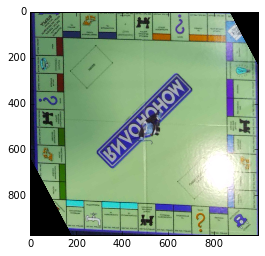

(<matplotlib.image.AxesImage at 0x7f47f89eacf8>, None)

In [207]:
plt.imshow(pic),plt.show()

In [168]:
%matplotlib inline

In [ ]:
# if one is bad then try to use 3